Project HCI 584X - Personal Budgeting and Expense Tracker

In [ ]:
%pip install openpyxl

In [11]:
import pandas as pd
from datetime import datetime

def init():
    """
    Initializes the expense tracking system.
    """
    categories = ['Food', 'Housing', 'Transportation', 'Entertainment', 'Health and Fitness', 
                  'Personal Care', 'Education', 'Savings and Investments', 'Others/Miscellaneous']

    # Save categories as CSV file
    with open('categories.csv', 'w') as f:
        for category in categories:
            f.write(f"{category}\n")

    # Define columns with types
    columns = {
        'Date': pd.Series(dtype='datetime64[ns]'),
        'Category': pd.Series(dtype='str'),
        'Amount': pd.Series(dtype='float')
    }
    
    # Create a DataFrame to store the expenses    
    df = pd.DataFrame(columns)
    df.to_excel('expenses.xlsx', index=False)
    print("Initialization complete. Categories and expenses have been saved.")

# Test for init function
print("\nTesting init()")
init()
print("Check 'categories.csv' for default categories and 'expenses.xlsx' for an empty expense sheet.")


Testing init()
Initialization complete. Categories and expenses have been saved.
Check 'categories.csv' for default categories and 'expenses.xlsx' for an empty expense sheet.


In [5]:
def read_categories(): 
    """Reads categories from a CSV file and returns them as a list."""
    with open('categories.csv', 'r') as f:
        categories = f.read().splitlines() 
    return categories

# Test for read_categories function
print("\nTesting read_categories()")
categories = read_categories()
print("Categories read from CSV:")
print(categories)
print("Expected to see the default categories including 'Food', 'Housing', etc.")


Testing read_categories()
Categories read from CSV:
['Food', 'Housing', 'Transportation', 'Entertainment', 'Health and Fitness', 'Personal Care', 'Education', 'Savings and Investments', 'Others/Miscellaneous']
Expected to see the default categories including 'Food', 'Housing', etc.


In [14]:
def log_expense(amount=None, category_number=None, date_input=None):
    """
    Logs an expense. Repeats until a valid entry is provided.
    """
    # Read the list of categories from a CSV file using the helper function `read_categories`
    categories = read_categories()
    
    # Load the existing expenses from 'expenses.xlsx' into a DataFrame
    df = pd.read_excel('expenses.xlsx')
    
    # Create a dictionary to map category numbers to their names
    # For example, {'1': 'Food', '2': 'Housing', ...}
    categories_dict = {str(i + 1): category for i, category in enumerate(categories)}

    # Start a loop to ensure valid inputs are provided for amount, category, and date
    while True:
        # If the amount is not provided, prompt the user to enter it
        if amount is None:
            amount = input("Enter the amount: ")
        try:
            # Try to convert the input amount to a float
            amount = float(amount)
        except ValueError:
            # If conversion fails, print an error message and restart the loop
            print("Invalid amount. Please enter a valid number.")
            continue

        # If the category number is not provided, prompt the user to select one
        if category_number is None:
            category_number = input(f"Enter the category number {categories_dict}: ")
        
        # Retrieve the category name using the entered category number
        category = categories_dict.get(str(category_number))

        # If the category number is invalid, print an error message and restart the loop
        if not category:
            print(f"Invalid category number. Please select a valid category.")
            continue

        # If the date input is not provided, prompt the user to enter a date
        if date_input is None:
            date_input = input("Enter the date (YYYY-MM-DD) or press enter for today's date: ")
        
        # If the user presses enter, use today's date
        if date_input == "":
            date = datetime.now().date()
        else:
            try:
                # Try to convert the date input to a `datetime` object
                date = datetime.strptime(date_input, "%Y-%m-%d").date()
            except ValueError:
                # If conversion fails, print an error message and restart the loop
                print("Invalid date format. Please enter the date in YYYY-MM-DD format.")
                continue

        # Create a dictionary representing the new expense entry
        new_row = {'Date': [date], 'Category': [category], 'Amount': [amount]}

        # Convert the dictionary to a DataFrame so it can be appended to the existing data
        new_row_df = pd.DataFrame(new_row)
        
        # if df is empty, create a new DataFrame from new_row, and also define the desired dtypes for each column
        if df.empty:
            # Define the desired dtypes for each column
            dtypes = {
                'Date': 'datetime64[ns]',
                'Category': 'str',
                'Amount': 'float'
            }
            df = pd.DataFrame(new_row).astype(dtypes)
            print(df)

        else:
            # Concatenate the new DataFrame to the existing one, effectively adding the new expense
            df = pd.concat([df, new_row_df], ignore_index=True)
        
        # Save the updated DataFrame back to 'expenses.xlsx'
        df.to_excel('expenses.xlsx', index=False)
        
        # Print a message confirming the expense was logged
        print(f"Expense logged: ${amount} in {category} on {date}.")
        
        # Return `True` to indicate the logging process was successful
        return True

# Test for log_expense function
print("\nTesting log_expense()")
print("Logging an expense of $15.00 under 'Food' with today's date...")
log_expense(15.00, 1, "2024-10-14")
print("Check 'expenses.xlsx' to see if the new expense is logged.")
log_expense(20.00, 2, "2024-10-14")


Testing log_expense()
Logging an expense of $15.00 under 'Food' with today's date...
Expense logged: $15.0 in Food on 2024-10-14.
Check 'expenses.xlsx' to see if the new expense is logged.
Expense logged: $20.0 in Housing on 2024-10-14.


True

In [16]:
def add_category(category):
    """
    Adds a new category and saves it back to the categories CSV.
    """
    # Read the existing list of categories using the helper function `read_categories`.
    categories = read_categories()
    
    # Check if the new category is not already in the existing list.
    if category not in categories:
        # If it's not present, add the new category to the list.
        categories.append(category)
        
        # Open the 'categories.csv' file in write mode to update the file with the new list.
        with open('categories.csv', 'w') as f:
            # Write each category from the updated list into the file, one per line.
            for cat in categories:
                f.write(f"{cat}\n")
        
        # Print a message confirming that the new category was added.
        print(f"Category '{category}' added.")
    else:
        # If the category already exists, print a message stating that it already exists.
        print(f"Category '{category}' already exists.")

# Test for add_category function
print("\nTesting add_category()")
print("Adding a new category 'Travel'...")
add_category("Travel")
print("Check 'categories.csv' to see if 'Travel' was added.")
add_category("Travel")   # test for already existing category


Testing add_category()
Adding a new category 'Travel'...
Category 'Travel' already exists.
Check 'categories.csv' to see if 'Travel' was added.
Category 'Travel' already exists.


In [17]:
# this is nice for version 1 but once you have a UI you would get the list from read_categories
# and have the UI disaply the list of categories
def view_categories():
    """
    Displays the list of expense categories.
    """
    # Read the existing list of categories using the helper function `read_categories`.
    categories = read_categories()
    
    # Print a header for the category list.
    print("Categories:")
    
    # Loop through each category and print it in a bullet-point format.
    for category in categories:
        print(f"- {category}")

# Test for view_categories function
print("\nTesting view_categories()")
view_categories()
print("Expected to see the list of categories including 'Food', 'Housing', and possibly 'Travel'.")


Testing view_categories()
Categories:
- Food
- Housing
- Transportation
- Entertainment
- Health and Fitness
- Personal Care
- Education
- Savings and Investments
- Others/Miscellaneous
- Travel
Expected to see the list of categories including 'Food', 'Housing', and possibly 'Travel'.


In [18]:
# CH for version 2 you could use the budget in the categories.csv file
# it would have to changed to this
# Category,Budget
# Food, 20
# Housing, -1  # negative means no budget was set
# ...
# then read/write it using pandas

def check_budget(category, budget):
    """
    Checks if the total expenses in a given category exceed the specified budget.
    """
    # Read the expenses data from the 'expenses.xlsx' file into a DataFrame.
    df = pd.read_excel('expenses.xlsx')
    
    # Filter the DataFrame to get the total expenses for the specified category and sum them up.
    category_expenses = df[df['Category'] == category]['Amount'].sum()
    
    # Compare total expenses with the provided budget and print appropriate messages.
    if category_expenses > budget:
        # If expenses exceed the budget, print a warning message.
        print(f"Warning: You have exceeded your budget of ${budget} for {category}. Total spent: ${category_expenses}.")
    else:
        # If expenses are within the budget, print a positive message.
        print(f"Good news! You are within your budget of ${budget} for {category}. Total spent: ${category_expenses}.")

# Test for check_budget function
print("\nTesting check_budget()")
print("Setting a budget of $10.00 for 'Food'.")
check_budget("Food", 10.00)
print("!!!Expected output: Warning message since total expenses in 'Food' is $15.00, which exceeds $10.00!!!")


Testing check_budget()
Setting a budget of $10.00 for 'Food'.
!!!Expected output: Warning message since total expenses in 'Food' is $15.00, which exceeds $10.00!!!


In [12]:
check_budget("Savings and Investment", 15.00)
log_expense(23.00, 4, "2024-10-14")
view_categories()

Good news! You are within your budget of $15.0 for Savings and Investment. Total spent: $0.
Expense logged: $23.0 in Entertainment on 2024-10-14.
Categories:
- Food
- Housing
- Transportation
- Entertainment
- Health and Fitness
- Personal Care
- Education
- Savings and Investments
- Others/Miscellaneous
- Travel


        Date Category  Amount
0 2024-10-14     Food      15
1 2024-10-14     Food      15
2 2024-10-14     Food      15
3 2024-10-14  Housing      20


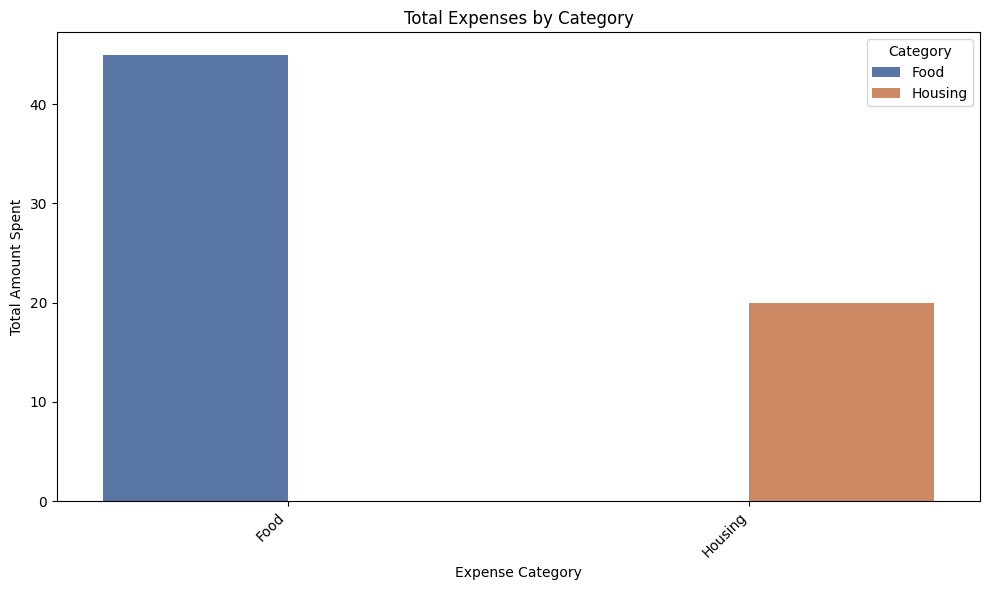

In [20]:
# Use seaborn to plot the data
# this is pretty simple and will eventually need to be customized
# to show the expense limits in some way

import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from the Excel file
df = pd.read_excel('expenses.xlsx')

# Check the structure of the dataframe
print(df.head())

# Assuming df has columns 'Date', 'Category', and 'Amount'
# Convert 'Date' to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Add the total expense by category for simplicity in plotting
category_expenses = df.groupby('Category')['Amount'].sum().reset_index()

# Create a basic bar plot with Seaborn to show total expenses per category
plt.figure(figsize=(10, 6))

# CH changed this b/c it was giving a Future warning
#sns.barplot(x='Category', y='Amount', data=category_expenses, palette='viridis')
sns.barplot(x='Category', y='Amount', hue='Category', data=category_expenses, palette='deep', dodge=True, legend=True)

# Add labels and title to the plot
plt.xlabel('Expense Category')
plt.ylabel('Total Amount Spent')
plt.title('Total Expenses by Category')
plt.xticks(rotation=45, ha='right')  # Rotate the category names for better readability
plt.tight_layout()

# Display the plot
plt.show()

other color pallette options for category colors:

deep: A default qualitative palette with a variety of colors.
muted: A palette with softer colors.
pastel: A palette with light, pastel colors.
bright: A palette with bright, vibrant colors.
dark: A palette with darker colors.
colorblind: A palette designed to be accessible to colorblind individuals.